In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
df=pd.read_excel("D:\DATAS\TBC\TBC.xlsx")  #input data

In [11]:
y=df['Diagnosis Akhir']
x=df.drop(columns=['Diagnosis Akhir'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [21]:
model=LogisticRegression(random_state=42).fit(x_train,y_train)
y_pred=model.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, precision_score, recall_score,roc_auc_score, log_loss

In [ ]:
accuracy1=accuracy_score(y_test,y_pred1)
recall1=recall_score(y_test,y_pred1)
precission1=precision_score(y_test,y_pred1)
cm1=confusion_matrix(y_test,y_pred1)
auc1=roc_auc_score(y_test,y_pred1)
sensitivity1=recall_score(y_test,y_pred1)
logloss1=log_loss(y_test,y_pred1)
print(f"log loss: {logloss1}")

In [24]:
import seaborn as sns

In [28]:
def performa_model (y_test,y_pred):
    accuracy=accuracy_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    auc=roc_auc_score(y_test,y_pred)
    sensitivity=recall_score(y_test,y_pred)
    logloss=log_loss(y_test,y_pred)
    print(f"accuracy: {accuracy}")
    print(f"recall: {recall}")
    print(f"precision: {precision}")
    print(f"auc: {auc}")
    print(f"sensitivity: {sensitivity}")
    print(f"log loss: {logloss}")

In [29]:
performa_model(y_test,ypred)

accuracy: 0.9333333333333333
recall: 0.85
precision: 1.0
auc: 0.925
sensitivity: 0.85
log loss: 2.4029102259411435


<Axes: >

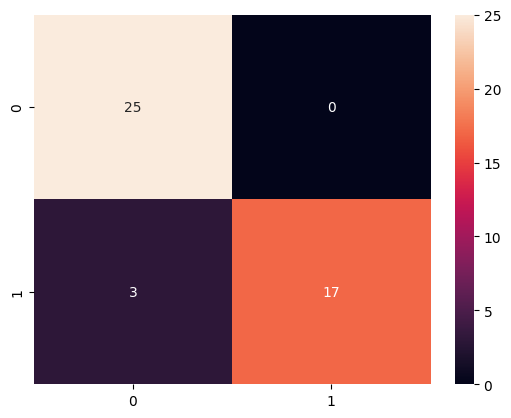

In [25]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [33]:
print(model.coef_)

[[-0.11445395  2.21326721  1.94686093  1.77433997  0.95717014  0.32738901
  -0.09874977 -0.34012419]]


In [35]:
from sklearn.model_selection import cross_val_score

In [39]:
cv=cross_val_score(model,x_train,y_train,cv=10,scoring='roc_auc')
print(f"Cross-validation scores: {cv}")
print(f"Mean cross-validation score: {cv.mean()}")

Cross-validation scores: [0.98461538 0.90769231 1.         0.96923077 0.95833333 0.95833333
 0.95833333 1.         0.96666667 0.91666667]
Mean cross-validation score: 0.9619871794871795


XGBoost

In [42]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [44]:
parameter={
    'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'max_depth':[3,4,5,6,7,8,9,10],
    'n_estimators':[100,200,300,400,500],
    'scale_pos_weight':[2],
    'subsample':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'n_jobs':[-1],
}

In [45]:
optimized_params=RandomizedSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42),
    param_distributions=parameter,
    verbose=0,
    scoring='roc_auc'
)

In [46]:
optimized_params.fit(
    x_train,y_train
)

print(optimized_params.best_params_)
print(optimized_params.best_score_)

{'subsample': 0.4, 'scale_pos_weight': 2, 'n_jobs': -1, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.3}
0.9640666666666666


In [47]:
best_params=optimized_params.best_params_

In [49]:
model_xgb=xgb.XGBClassifier(**best_params)
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [50]:
xgb_predict=model_xgb.predict(x_test)

In [51]:
xgb_cv=cross_val_score(model_xgb,x_train,y_train,cv=5,scoring='roc_auc')
print(f"Cross-validation scores: {xgb_cv}")
print(f"Mean cross-validation score: {xgb_cv.mean()}")


Cross-validation scores: [0.92363636 0.95636364 0.97454545 0.988      0.92424242]
Mean cross-validation score: 0.9533575757575757


In [52]:
performa_model(y_test,xgb_predict)

accuracy: 0.9111111111111111
recall: 0.85
precision: 0.9444444444444444
auc: 0.905
sensitivity: 0.85
log loss: 3.2038803012548582


In [54]:
from sklearn.model_selection import cross_val_predict

In [56]:
pred_cv=cross_val_predict(model_xgb,x_train,y_train,cv=5,method='predict_proba')    
print(pred_cv)

[[2.4719721e-01 7.5280279e-01]
 [9.9788135e-01 2.1186359e-03]
 [7.7465987e-01 2.2534010e-01]
 [7.6842737e-01 2.3157264e-01]
 [4.4682026e-03 9.9553180e-01]
 [9.9876845e-01 1.2315343e-03]
 [2.8190613e-03 9.9718094e-01]
 [5.7665706e-03 9.9423343e-01]
 [4.8243999e-04 9.9951756e-01]
 [9.8809379e-01 1.1906206e-02]
 [9.9313867e-01 6.8613179e-03]
 [2.7607131e-01 7.2392869e-01]
 [9.7937214e-01 2.0627879e-02]
 [2.0010298e-01 7.9989702e-01]
 [9.9833798e-01 1.6620005e-03]
 [9.1993797e-01 8.0062054e-02]
 [9.9628496e-01 3.7150651e-03]
 [9.9505162e-01 4.9483757e-03]
 [2.4862498e-01 7.5137502e-01]
 [9.6004605e-03 9.9039954e-01]
 [9.8731279e-01 1.2687198e-02]
 [9.7371757e-01 2.6282445e-02]
 [9.9934012e-01 6.5985916e-04]
 [9.9636674e-01 3.6332652e-03]
 [9.9887925e-01 1.1207430e-03]
 [9.9950218e-01 4.9783569e-04]
 [2.9859173e-01 7.0140827e-01]
 [9.9880487e-01 1.1951141e-03]
 [9.9628496e-01 3.7150651e-03]
 [9.9202621e-01 7.9738041e-03]
 [9.9874794e-01 1.2520726e-03]
 [6.2373042e-02 9.3762696e-01]
 [7.4267

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay